# Introduction to linear regression

In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
data(mlb11)
str(mlb11)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	30 obs. of  12 variables:
 $ team        : Factor w/ 30 levels "Arizona Diamondbacks",..: 28 4 10 13 26 18 19 16 9 12 ...
 $ runs        : int  855 875 787 730 762 718 867 721 735 615 ...
 $ at_bats     : int  5659 5710 5563 5672 5532 5600 5518 5447 5544 5598 ...
 $ hits        : int  1599 1600 1540 1560 1513 1477 1452 1422 1429 1442 ...
 $ homeruns    : int  210 203 169 129 162 108 222 185 163 95 ...
 $ bat_avg     : num  0.283 0.28 0.277 0.275 0.273 0.264 0.263 0.261 0.258 0.258 ...
 $ strikeouts  : int  930 1108 1143 1006 978 1085 1138 1083 1201 1164 ...
 $ stolen_bases: int  143 102 49 153 57 130 147 94 118 118 ...
 $ wins        : int  96 90 95 71 90 77 97 96 73 56 ...
 $ new_onbase  : num  0.34 0.349 0.34 0.329 0.341 0.335 0.343 0.325 0.329 0.311 ...
 $ new_slug    : num  0.46 0.461 0.434 0.415 0.425 0.391 0.444 0.425 0.41 0.374 ...
 $ new_obs     : num  0.8 0.81 0.773 0.744 0.766 0.725 0.788 0.75 0.739 0.684 ...


# Q: What type of plot would you use to display the relationship between runs and one of the other numerical variables?
- histogram
- box plot
- scatterplot
- bar plot

# A: scatterplot

# Q: Plot the relationship between runs and at_bats, using at_bats as the explanatory variable. The relationship appears to be …
- linear
- negative
- horseshoe-shaped (∩
)
- u-shaped (∪
)

The following objects are masked from mlb11 (pos = 3):

    at_bats, bat_avg, hits, homeruns, new_obs, new_onbase, new_slug,
    runs, stolen_bases, strikeouts, team, wins

The following objects are masked from mlb11 (pos = 4):

    at_bats, bat_avg, hits, homeruns, new_obs, new_onbase, new_slug,
    runs, stolen_bases, strikeouts, team, wins

The following objects are masked from mlb11 (pos = 5):

    at_bats, bat_avg, hits, homeruns, new_obs, new_onbase, new_slug,
    runs, stolen_bases, strikeouts, team, wins



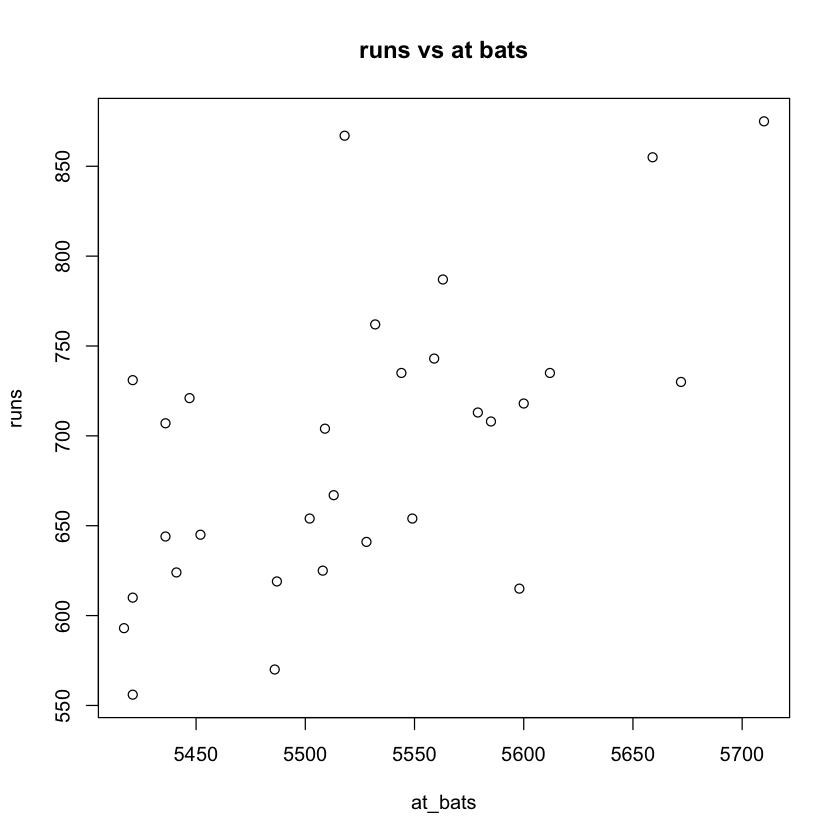

In [9]:
attach(mlb11)
plot(
    mlb11$at_bats,
    mlb11$runs,
    ylab="runs",
    xlab="at_bats",
    main="runs vs at bats"
)

# A: linear

In [10]:
mlb11 %>%
  summarise(cor(runs, at_bats))

"cor(runs, at_bats)"
0.610627


# Q: Looking at your plot from the previous exercise, which of the following best describe the relationship between these two variables?
- The relationship is negative, linear, and moderately strong. One of the potential outliers is a team with approximately 5520 at bats.
- The relationship is positive, linear, and moderately strong. One of the potential outliers is a team with approximately 5520 at bats.
- The relationship is positive, linear, and very weak. There are no outliers.
- The relationship is positive, linear, and very weak. One of the potential outliers is a team with approximately 5520 at bats.

# A: The relationship is positive, linear, and very weak. One of the potential outliers is a team with approximately 5520 at bats.

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

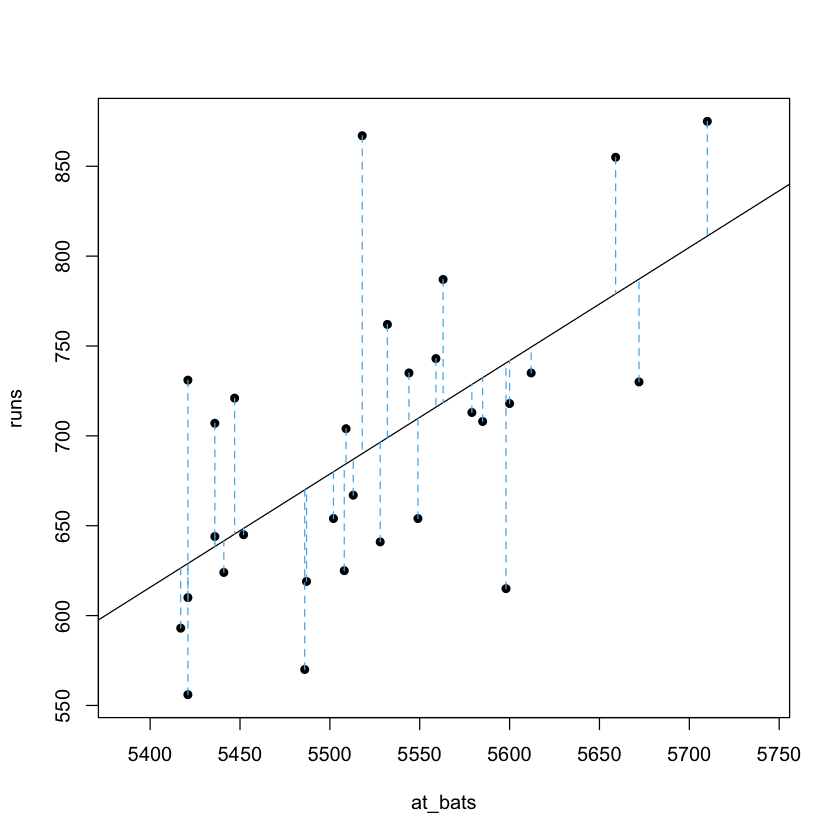

In [12]:
plot_ss(
    x = at_bats,
    y = runs,
    data = mlb11
)

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

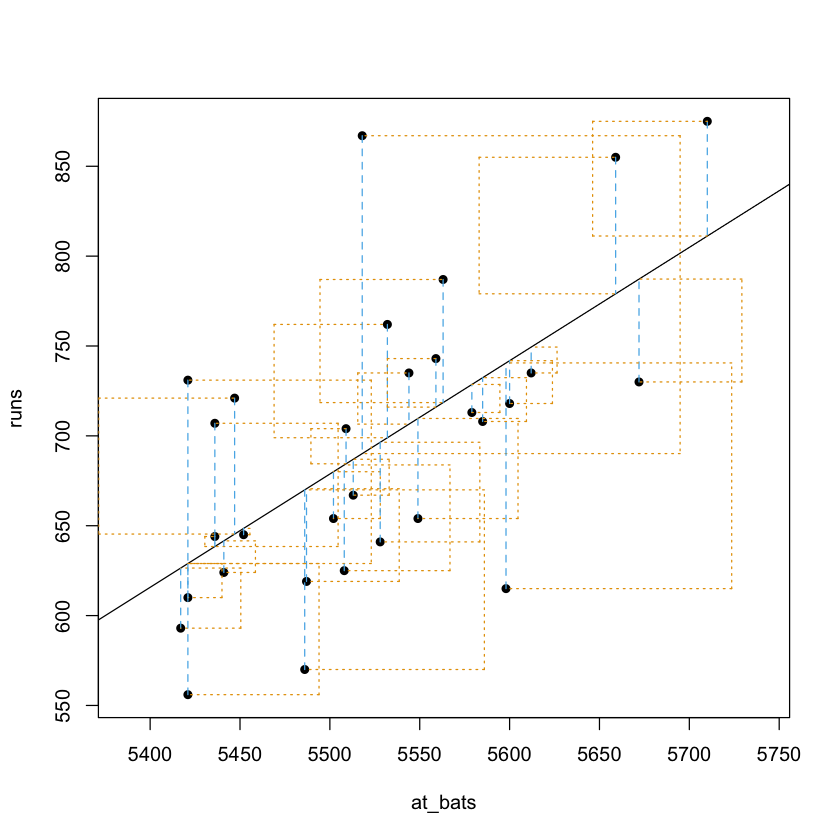

In [13]:
plot_ss(x = at_bats, y = runs, data = mlb11, showSquares = TRUE)

In [15]:
m1 <- lm(
    runs ~ at_bats,
    data = mlb11
)

In [16]:
summary(m1)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


# Q: Fit a new model that uses homeruns to predict runs. Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?
- For each additional home run, the model predicts 1.83 more runs, on average.
- Each additional home run increases runs by 1.83.
- For each additional home run, the model predicts 1.83 fewer runs, on average.
- For each additional home run, the model predicts 415.24 more runs, on average.
- For each additional home run, the model predicts 415.24 fewer runs, on average.

In [17]:
m2 <- lm(
    runs ~ homeruns,
    data = mlb11
)

In [18]:
summary(m2)


Call:
lm(formula = runs ~ homeruns, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
    415.239        1.835  

Sum of Squares:  73671.99

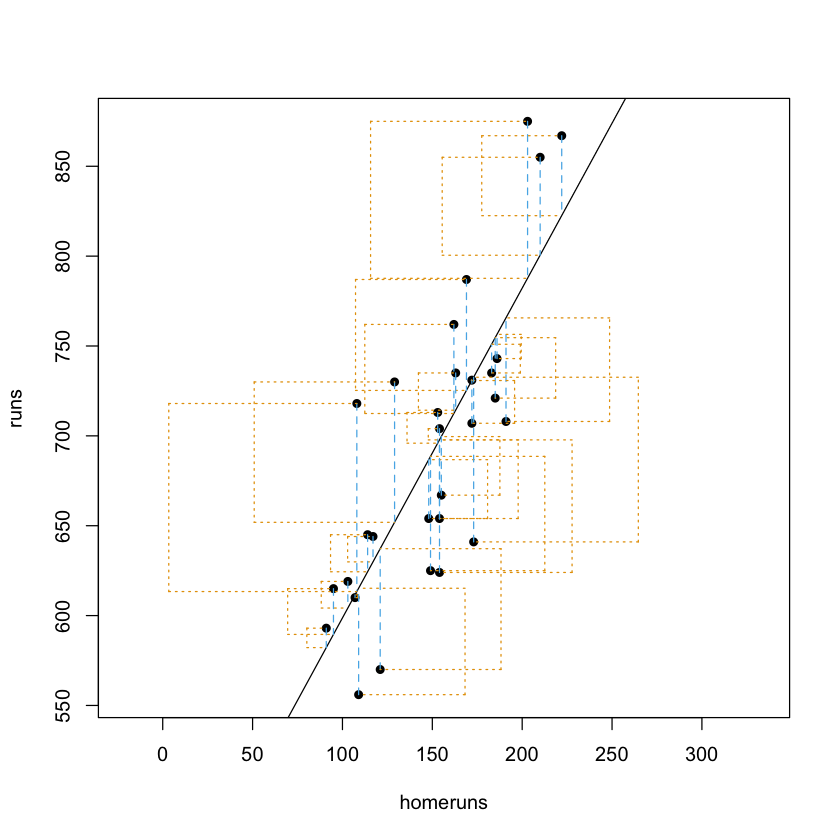

In [19]:
plot_ss(x = homeruns, y = runs, data = mlb11, showSquares = TRUE)

# A: For each additional home run, the model predicts 1.83 more runs, on average.

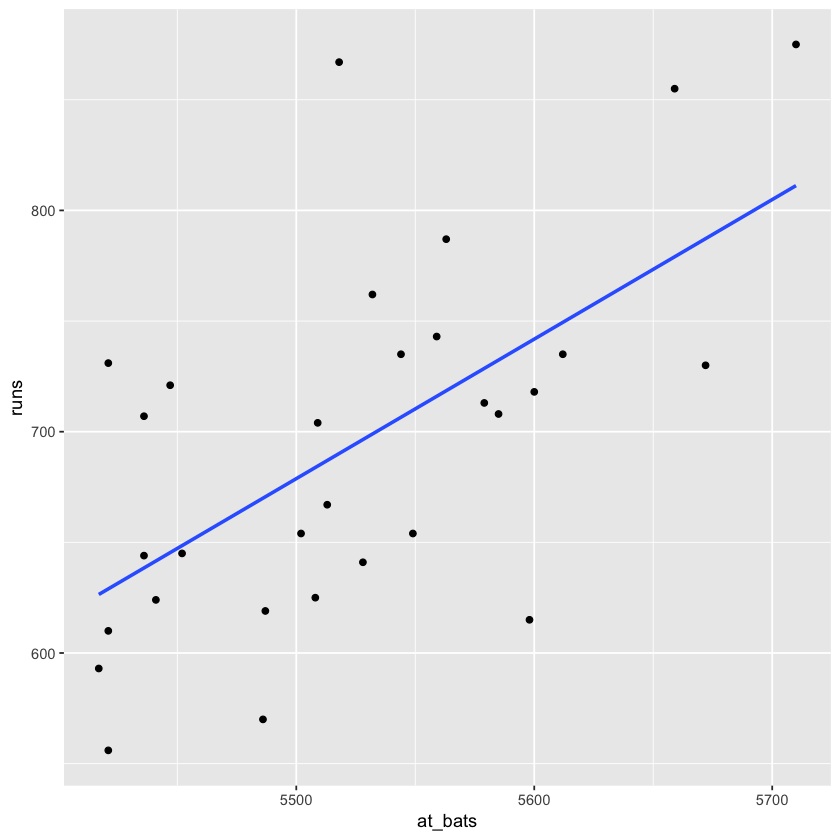

In [20]:
ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

# Q: If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,579 at-bats? Is this an overestimate or an underestimate, and by how much?

# A: roughly 725, as a visual estimate

In [21]:
mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)

runs
713


# Q: What is the residual for the prediction of runs for a team with 5,579 at-bats? Choose the closest answer.
- -15.32
- 15.32
- 713
- 5579

# A: 15.32

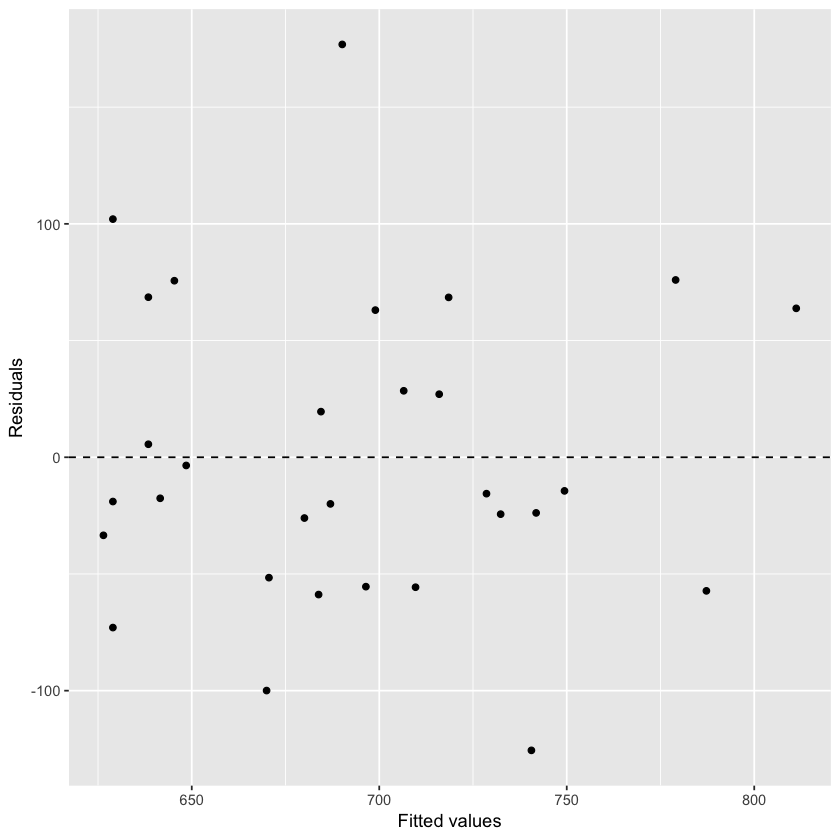

In [22]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

# Q: Which of the following statements about the residual plot is false?
- The residuals appear to be randomly distributed around 0.
- The residuals show a curved pattern.
- The plot is indicative of a linear relationship between runs and at-bats.
- The team with a very high residual compared to the others appears to be an outlier.

# A: The following appears to be *false* - the residuals show a curved pattern.

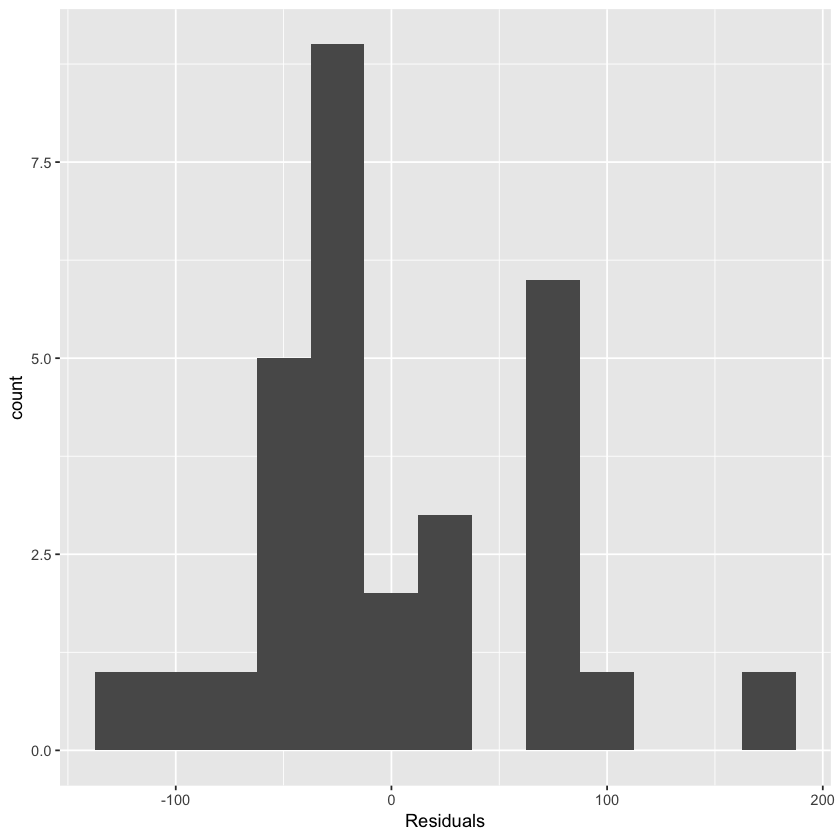

In [23]:
ggplot(data = m1, aes(x = .resid)) +
  geom_histogram(binwidth = 25) +
  xlab("Residuals")

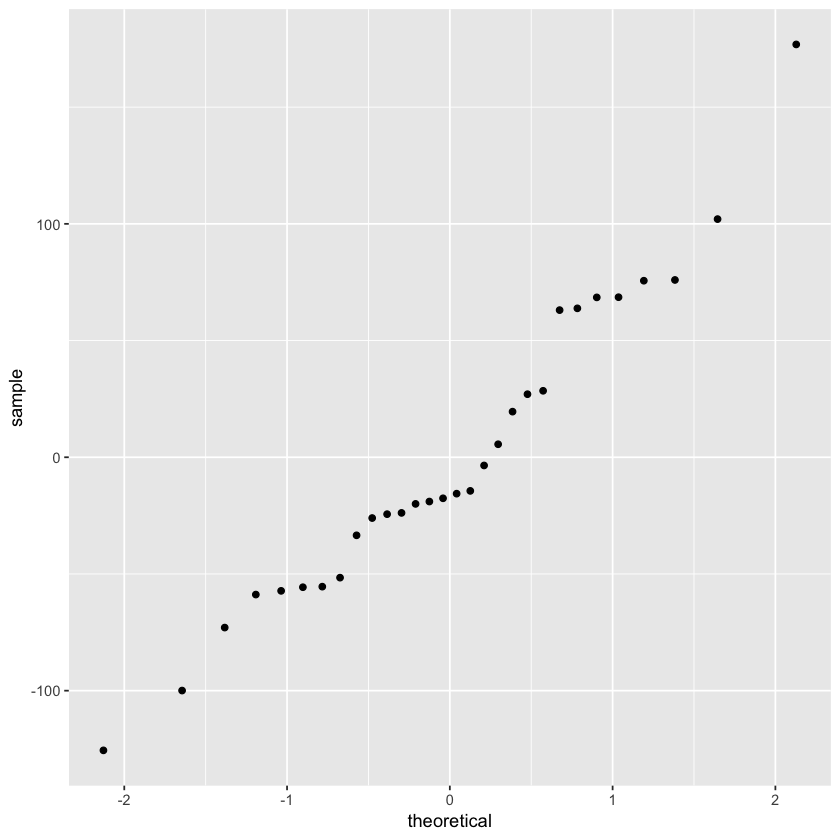

In [24]:
ggplot(data = m1, aes(sample = .resid)) +
  stat_qq()

# Q: Which of the following is true?
- The residuals are extremely right skewed, hence the normal distribution of residuals condition is not met.
- The residuals are extremely left skewed, hence the normal distribution of residuals condition is not met.
- The residuals are perfectly symmetric, hence the normal distribution of residuals condition is met.
- The residuals are fairly symmetric, with only a slightly longer tail on the right, hence it would be appropriate to deem the the normal distribution of residuals condition met.

# A: The residuals are fairly symmetric, with only a slightly longer tail on the right, hence it would be appropriate to deem the the normal distribution of residuals condition met.

# Q: Based on the residuals plot from earlier, the constant variability condition appears to be met.
- True
- False

# A: true

# Q: Choose another one of the seven traditional variables from mlb11 besides at_bats that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

# A: TODO - make scatterplot, fit linear model

# Q: How does this relationship compare to the relationship between runs and at_bats? Use the R2 values from the two model summaries to compare. Does your variable seem to predict runs better than at_bats? How can you tell?

# A: TODO - compare R^2 values to compare models

# Q: Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts runs? Support your conclusion using the graphical and numerical methods we’ve discussed.
- at bats
- hits
- wins
- batting average

# A: TODO - manually search for the strength of linear relationships between runs and the above four variables and compare R^2 values

# Q: Now examine the three newer variables. These are the statistics used by the author of Moneyball to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we’ve analyzed, which seems to be the best predictor of runs?
- on-base plus slugging (new_obs)
- slugging percentage (new_slug)
- on-base percentage (new_onbase)

# A: TODO - manually evaluate more relationships